In this project we are analyzing a popular twitter page @dog_rates which is provided as a .csv file from Twitter archive. Tweepy is the API which is used as interface to the twitter API to download JSON data about retweet counts and favorite counts. 
We also need to download a file from Udacity servers using http request which predicts if the images are of dogs are not.

### We will be gathering, assessing and cleaning the data 
 * To find distribution of the tweets over time.
 * To find average counts of retweets of the page and favourites
 * To find average rate dogs receive
 * To find if dog stages affect ratings.
 * To find the most popular breed of dog to pet

## Code

In [1]:
import tweepy
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import collections
import sqlite3
import requests
from timeit import default_timer as timer

### Gathering Data

#### 1) Downloading image_predictions.tsv file from Udacity servers:

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [3]:
# Save .tsv to file for future use.
with open("image_predictions.tsv", mode = 'wb') as file:
    file.write(response.content)

In [4]:
df_image = pd.read_csv('image_predictions.tsv', sep = '\t')

#### 2) Reading the data from given 'twitter-archive-enhanced.csv' file into df_tweets:

In [6]:
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')

##### Storing the Tweet_ids in a list

In [8]:
Tweet_IDs = df_tweets['tweet_id']
len(Tweet_IDs)

2356

#### 3) Getting Retweet count and favourites count on each Tweet_ID from Twitter using tweepy

In [9]:
consumer_key = 'x123'
consumer_secret = 'y123'
access_token = 'a123'
access_secret = 'b123'

try:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
except tweepy.TweepError as t:
    print(t.message)

api = tweepy.API(auth, wait_on_rate_limit= True, wait_on_rate_limit_notify= True)
tweet_data = []
for tweet_id in Tweet_IDs:
    try:
        temp = api.get_status(tweet_id)._json
        tweet_data.append({'tweet_id':temp['id'],
                           'favorite_count':temp['favorite_count'],
                           'favorited':temp['favorited'],
                           'retweet_count':temp['retweet_count'],
                           'retweeted':temp['retweeted']})
        print(str(tweet_id) + ': done')
    except tweepy.TweepError as t:
        print('{} : {}'.format(tweet_id, t))

892420643555336193: done
892177421306343426: done
891815181378084864: done
891689557279858688: done
891327558926688256: done
891087950875897856: done
890971913173991426: done
890729181411237888: done
890609185150312448: done
890240255349198849: done
890006608113172480: done
889880896479866881: done
889665388333682689: done
889638837579907072: done
889531135344209921: done
889278841981685760: done
888917238123831296: done
888804989199671297: done
888554962724278272: done
888202515573088257 : [{'code': 144, 'message': 'No status found with that ID.'}]
888078434458587136: done
887705289381826560: done
887517139158093824: done
887473957103951883: done
887343217045368832: done
887101392804085760: done
886983233522544640: done
886736880519319552: done
886680336477933568: done
886366144734445568: done
886267009285017600: done
886258384151887873: done
886054160059072513: done
885984800019947520: done
885528943205470208: done
885518971528720385: done
885311592912609280: done
885167619883638784:

836989968035819520: done
836753516572119041: done
836677758902222849: done
836648853927522308: done
836397794269200385: done
836380477523124226: done
836260088725786625: done
836001077879255040: done
835685285446955009: done
835574547218894849: done
835536468978302976: done
835309094223372289: done
835297930240217089: done
835264098648616962: done
835246439529840640: done
835172783151792128: done
835152434251116546: done
834931633769889797: done
834786237630337024: done
834574053763584002: done
834477809192075265: done
834458053273591808: done
834209720923721728: done
834167344700198914: done
834089966724603904: done
834086379323871233: done
833863086058651648: done
833826103416520705: done
833732339549220864: done
833722901757046785: done
833479644947025920: done
833124694597443584: done
832998151111966721: done
832769181346996225: done
832757312314028032: done
832682457690300417: done
832645525019123713: done
832636094638288896: done
832397543355072512: done
832369877331693569: done


796177847564038144: done
796149749086875649: done
796125600683540480: done
796116448414461957: done
796080075804475393: done
796031486298386433: done
795464331001561088: done
795400264262053889: done
795076730285391872: done
794983741416415232: done
794926597468000259: done
794355576146903043: done
794332329137291264: done
794205286408003585: done
793962221541933056: done
793845145112371200: done
793614319594401792: done
793601777308463104: done
793500921481273345: done
793286476301799424: done
793271401113350145: done
793256262322548741: done
793241302385262592: done
793226087023144960: done
793210959003287553: done
793195938047070209: done
793180763617361921: done
793165685325201412: done
793150605191548928: done
793135492858580992: done
793120401413079041: done
792913359805018113: done
792883833364439040: done
792773781206999040: done
792394556390137856: done
792050063153438720: done
791821351946420224: done
791784077045166082: done
791780927877898241: done
791774931465953280: done


Rate limit reached. Sleeping for: 501


758740312047005698: done
758474966123810816: done
758467244762497024: done
758405701903519748: done
758355060040593408: done
758099635764359168: done
758041019896193024: done
757741869644341248: done
757729163776290825: done
757725642876129280: done
757611664640446465: done
757597904299253760: done
757596066325864448: done
757400162377592832: done
757393109802180609: done
757354760399941633: done
756998049151549440: done
756939218950160384: done
756651752796094464: done
756526248105566208: done
756303284449767430: done
756288534030475264: done
756275833623502848: done
755955933503782912: done
755206590534418437: done
755110668769038337: done
754874841593970688: done
754856583969079297: done
754747087846248448: done
754482103782404096: done
754449512966619136: done
754120377874386944: done
754011816964026368 : [{'code': 144, 'message': 'No status found with that ID.'}]
753655901052166144: done
753420520834629632: done
753398408988139520: done
753375668877008896: done
753298634498793472:

713919462244790272: done
713909862279876608: done
713900603437621249: done
713761197720473600: done
713411074226274305: done
713177543487135744: done
713175907180089344: done
712809025985978368: done
712717840512598017: done
712668654853337088: done
712438159032893441: done
712309440758808576: done
712097430750289920: done
712092745624633345: done
712085617388212225: done
712065007010385924: done
711998809858043904: done
711968124745228288: done
711743778164514816: done
711732680602345472: done
711694788429553666: done
711652651650457602: done
711363825979756544: done
711306686208872448: done
711008018775851008: done
710997087345876993: done
710844581445812225: done
710833117892898816: done
710658690886586372: done
710609963652087808: done
710588934686908417: done
710296729921429505: done
710283270106132480: done
710272297844797440: done
710269109699739648: done
710153181850935296: done
710140971284037632: done
710117014656950272: done
709918798883774466: done
709901256215666688: done


688898160958271489: done
688894073864884227: done
688828561667567616: done
688804835492233216: done
688789766343622656: done
688547210804498433: done
688519176466644993: done
688385280030670848: done
688211956440801280: done
688179443353796608: done
688116655151435777: done
688064179421470721: done
687841446767013888: done
687826841265172480: done
687818504314159109: done
687807801670897665: done
687732144991551489: done
687704180304273409: done
687664829264453632: done
687494652870668288: done
687480748861947905: done
687476254459715584: done
687460506001633280: done
687399393394311168: done
687317306314240000: done
687312378585812992: done
687127927494963200: done
687124485711986689: done
687109925361856513: done
687102708889812993: done
687096057537363968: done
686947101016735744: done
686760001961103360: done
686749460672679938: done
686730991906516992: done
686683045143953408: done
686618349602762752: done
686606069955735556: done
686394059078897668: done
686386521809772549: done


Rate limit reached. Sleeping for: 492


676975532580409345: done
676957860086095872: done
676949632774234114: done
676948236477857792: done
676946864479084545: done
676942428000112642: done
676936541936185344: done
676916996760600576: done
676897532954456065: done
676864501615042560: done
676821958043033607: done
676819651066732545: done
676811746707918848: done
676776431406465024: done
676617503762681856: done
676613908052996102: done
676606785097199616: done
676603393314578432: done
676593408224403456: done
676590572941893632: done
676588346097852417: done
676582956622721024: done
676575501977128964: done
676533798876651520: done
676496375194980353: done
676470639084101634: done
676440007570247681: done
676430933382295552: done
676263575653122048: done
676237365392908289: done
676219687039057920: done
676215927814406144: done
676191832485810177: done
676146341966438401: done
676121918416756736: done
676101918813499392: done
676098748976615425: done
676089483918516224: done
675898130735476737: done
675891555769696257: done


670303360680108032: done
670290420111441920: done
670093938074779648: done
670086499208155136: done
670079681849372674: done
670073503555706880: done
670069087419133954: done
670061506722140161: done
670055038660800512: done
670046952931721218: done
670040295598354432: done
670037189829525505: done
670003130994700288: done
669993076832759809: done
669972011175813120: done
669970042633789440: done
669942763794931712: done
669926384437997569: done
669923323644657664: done
669753178989142016: done
669749430875258880: done
669684865554620416: done
669683899023405056: done
669682095984410625: done
669680153564442624: done
669661792646373376: done
669625907762618368: done
669603084620980224: done
669597912108789760: done
669583744538451968: done
669573570759163904: done
669571471778410496: done
669567591774625800: done
669564461267722241: done
669393256313184256: done
669375718304980992: done
669371483794317312: done
669367896104181761: done
669363888236994561: done
669359674819481600: done


##### Storing tweet's entire set of JSON data in a file called tweet_json.txt:

In [10]:
json.dump(tweet_data, open('tweet_json.txt', 'w', encoding ='utf'), ensure_ascii=False, indent=4)

##### reading this .txt file line by line into a pandas DataFrame:

In [11]:
with open('tweet_json.txt','r') as f:
    data = json.load(f)
tweet_json_df = pd.DataFrame(data)
len(tweet_json_df.tweet_id)

2334

In [12]:
list(tweet_data)
tweet_json_df.head()

,favorite_count,favorited,retweet_count,retweeted,tweet_id
0,37393,False,8086,False,892420643555336193
1,32147,False,6001,False,892177421306343426
2,24230,False,3970,False,891815181378084864
3,40694,False,8250,False,891689557279858688
4,38922,False,8942,False,891327558926688256


In [13]:
# Creating a copy:
json_df = tweet_json_df.copy()

In [14]:
# Creating copies of original dataframe
df_image_clean = df_image.copy()
df_tweets_clean = df_tweets.copy()

## Assessment

In [15]:
df_image_clean.info()
df_tweets_clean.info()
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id

In [16]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
df_tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
json_df.head()

,favorite_count,favorited,retweet_count,retweeted,tweet_id
0,37393,False,8086,False,892420643555336193
1,32147,False,6001,False,892177421306343426
2,24230,False,3970,False,891815181378084864
3,40694,False,8250,False,891689557279858688
4,38922,False,8942,False,891327558926688256


#### Data Quality Issues in df_tweets_clean:
* Remove rows with "in reply to.." column values as they are not original tweets
* Drop the columns not required like source, expanded_urls, in_reply_to_status_id, retweeted_status_id, etc,. 
* Data type of timestamp column
* Keep data only till August 2017
* Handle tweets that dont exist any longer
* rating_numerator and rating_denominator data type should be float
* The rating_numerator and denominator data have alot of issues, handle them

#### Data Quality Issues in df_image_clean :
* df_image_clean has unnecesasry columns, drop them
* keep only tweet_id, p1, p1_dog and p1_conf.
* Rename these columns to give more clear info about the contents of columns

#### Data Tidiness Issues in df_tweets_clean:
* Dog stages to be merged into single column
* Merge two tables on Tweet_id tweet_json_df and df_tweets
* There are multiple Dog stages for same tweet_id. Handle that.
* Handle tweet urls that contain more than one url --- since this column is not required, can ignore this issue
* The "text" column has tweet contents and urls, should be separated --- since this column is not required, can ignore this issue

## Cleaning

### 1) Dropping the columns not required from both df_image_clean and df_image_clean
#### Define:
    - Dropping 'source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls' from                 df_tweets_clean
    - Dropping 'jpg_url', 'img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' from df_image_clean 

#### Code:

In [19]:
df_image_clean.drop(columns = ['jpg_url', 'img_num', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], inplace =True)
# json_df.drop(columns = ['created_at'], inplace = True)
df_tweets_clean.drop(columns = ['source','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'], inplace=True)

#### Test:

In [20]:
json_df.info()
df_tweets_clean.info()
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 5 columns):
favorite_count    2334 non-null int64
favorited         2334 non-null bool
retweet_count     2334 non-null int64
retweeted         2334 non-null bool
tweet_id          2334 non-null int64
dtypes: bool(2), int64(3)
memory usage: 59.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
text                     2356 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
dtyp

### 2) Renaming the columns of df_image_clean to give more clear idea about the contents of columns
#### Define:
        - Rename 'p1'to 'Dog_Breed', 'p1_conf' to 'Confidence',and  'p1_dog' to'Dog_or_not'

#### Code:

In [21]:
df_image_clean.rename(index=str, columns={'p1': 'Dog_Breed', 'p1_conf' :'Confidence', 'p1_dog' :'Dog_or_not'}, inplace =True)

#### Test:

In [22]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id      2075 non-null int64
Dog_Breed     2075 non-null object
Confidence    2075 non-null float64
Dog_or_not    2075 non-null bool
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 50.7+ KB


### 3) Merging  dfs json_df and df_tweets_clean and df_image_clean
#### Define:
    - Merge the three dataframes into one. 

#### Code

In [23]:
df_tweets_clean = df_tweets_clean.merge(json_df, on ='tweet_id',  how = 'outer',  suffixes=('', ''))

In [24]:
df_tweets_clean = df_tweets_clean.merge(df_image_clean, on = 'tweet_id', how = 'outer', suffixes=('',''))

#### Test:

In [25]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                 2356 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2356 non-null object
text                     2356 non-null object
rating_numerator         2356 non-null int64
rating_denominator       2356 non-null int64
name                     2356 non-null object
doggo                    2356 non-null object
floofer                  2356 non-null object
pupper                   2356 non-null object
puppo                    2356 non-null object
favorite_count           2334 non-null float64
favorited                2334 non-null object
retweet_count            2334 non-null float64
retweeted                2334 non-null object
Dog_Breed                2075 non-null object
Confidence               2075 non-null float64
Dog_or_not               2075 non-null object
dtypes: float64(5), i

In [26]:
df_tweets_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,favorited,retweet_count,retweeted,Dog_Breed,Confidence,Dog_or_not
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,37393.0,False,8086.0,False,orange,0.097049,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,32147.0,False,6001.0,False,Chihuahua,0.323581,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,24230.0,False,3970.0,False,Chihuahua,0.716012,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,40694.0,False,8250.0,False,paper_towel,0.170278,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,38922.0,False,8942.0,False,basset,0.555712,True


### 4) Removing retweets and dropping columns that are not required:
##### Define:
- Keep rows where 'in_reply_to_status_id' and 'in_reply_to_user_id' values are null as these are original tweets
- Remove rows where 'text' starts with RT @dog_rates.
- dropping columns, 'in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'

##### Code:

In [27]:
df_tweets_clean = df_tweets_clean[df_tweets_clean['in_reply_to_status_id'].isnull() & df_tweets_clean['in_reply_to_user_id'].isnull()]

In [28]:
## Checking for duplicates, ie, Retweets using text:
df_tweets_clean['text'].str.contains('RT @dog_rates', regex=False).sum()

156

In [29]:
## so there are still 156 duplicates to to removed.

In [30]:
df_tweets_clean = df_tweets_clean.drop(df_tweets_clean[df_tweets_clean['text'].str.contains('RT @dog_rates', regex=False)].index)

In [31]:
df_tweets_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'],inplace=True)

##### Test:

In [32]:
df_tweets_clean['text'].str.contains('RT @dog_rates', regex=False).sum()

0

In [33]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2122 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id              2122 non-null int64
timestamp             2122 non-null object
text                  2122 non-null object
rating_numerator      2122 non-null int64
rating_denominator    2122 non-null int64
name                  2122 non-null object
doggo                 2122 non-null object
floofer               2122 non-null object
pupper                2122 non-null object
puppo                 2122 non-null object
favorite_count        2114 non-null float64
favorited             2114 non-null object
retweet_count         2114 non-null float64
retweeted             2114 non-null object
Dog_Breed             1986 non-null object
Confidence            1986 non-null float64
Dog_or_not            1986 non-null object
dtypes: float64(3), int64(3), object(11)
memory usage: 207.2+ KB


### 5) converting column ''timestamp'' to datetime type
##### Define: 
Covert from str datetime type using  to_datetime


##### Code:

In [34]:
type(df_tweets_clean.timestamp[0])

str

In [35]:
df_tweets_clean.timestamp =pd.to_datetime(df_tweets_clean.timestamp)

##### Test:

In [36]:
type(df_tweets_clean.timestamp[0])

pandas._libs.tslibs.timestamps.Timestamp

### 6) Datatype of rating_numerator and rating_denominator should be float and Dog_or_not should be boolean
#### Define: 
- convert the columns datatype from int to float

#### Code

In [37]:
df_tweets_clean['rating_numerator'] = df_tweets_clean['rating_numerator'].astype('float')
df_tweets_clean['rating_denominator'] = df_tweets_clean['rating_denominator'].astype('float')
df_tweets_clean.Dog_or_not = df_tweets_clean.Dog_or_not.astype('bool')

#### Test

In [38]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2122 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id              2122 non-null int64
timestamp             2122 non-null datetime64[ns, UTC]
text                  2122 non-null object
rating_numerator      2122 non-null float64
rating_denominator    2122 non-null float64
name                  2122 non-null object
doggo                 2122 non-null object
floofer               2122 non-null object
pupper                2122 non-null object
puppo                 2122 non-null object
favorite_count        2114 non-null float64
favorited             2114 non-null object
retweet_count         2114 non-null float64
retweeted             2114 non-null object
Dog_Breed             1986 non-null object
Confidence            1986 non-null float64
Dog_or_not            2122 non-null bool
dtypes: bool(1), datetime64[ns, UTC](1), float64(5), int64(1), object(9)
memory usage: 273.3+ KB


### 7) Keep data only till August 2017

##### Define
- Filter out all data after 1st August 2017 as it is incomplete

##### Code

In [39]:
df_tweets_clean = df_tweets_clean[df_tweets_clean.timestamp <= '2017-07-01 00:00:00 +0000']

##### Test:

In [40]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2068 entries, 58 to 2355
Data columns (total 17 columns):
tweet_id              2068 non-null int64
timestamp             2068 non-null datetime64[ns, UTC]
text                  2068 non-null object
rating_numerator      2068 non-null float64
rating_denominator    2068 non-null float64
name                  2068 non-null object
doggo                 2068 non-null object
floofer               2068 non-null object
pupper                2068 non-null object
puppo                 2068 non-null object
favorite_count        2060 non-null float64
favorited             2060 non-null object
retweet_count         2060 non-null float64
retweeted             2060 non-null object
Dog_Breed             1935 non-null object
Confidence            1935 non-null float64
Dog_or_not            2068 non-null bool
dtypes: bool(1), datetime64[ns, UTC](1), float64(5), int64(1), object(9)
memory usage: 204.0+ KB


### 8) Handle tweets that dont exist any longer
#### Define:
- Only keep data for tweet_ids in df_tweets_clean which also exist in tweet_json_df as these are valid tweet_id only.

#### Code:

In [41]:
df_tweets_clean = df_tweets_clean[df_tweets_clean['tweet_id'].isin(tweet_json_df['tweet_id'])]

#### Test:

In [42]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2060 entries, 58 to 2355
Data columns (total 17 columns):
tweet_id              2060 non-null int64
timestamp             2060 non-null datetime64[ns, UTC]
text                  2060 non-null object
rating_numerator      2060 non-null float64
rating_denominator    2060 non-null float64
name                  2060 non-null object
doggo                 2060 non-null object
floofer               2060 non-null object
pupper                2060 non-null object
puppo                 2060 non-null object
favorite_count        2060 non-null float64
favorited             2060 non-null object
retweet_count         2060 non-null float64
retweeted             2060 non-null object
Dog_Breed             1928 non-null object
Confidence            1928 non-null float64
Dog_or_not            2060 non-null bool
dtypes: bool(1), datetime64[ns, UTC](1), float64(5), int64(1), object(9)
memory usage: 203.2+ KB


### 9) There are lot of issues in the rating_numerator and denominator columns, handle them

#### First Checking for rating discrepancies:

In [43]:
print(df_tweets_clean.rating_numerator.min())
print(df_tweets_clean.rating_numerator.max())
print(df_tweets_clean.rating_numerator.mean())

0.0
1776.0
12.17378640776699


In [44]:
df_tweets_clean[(df_tweets_clean['rating_denominator'] < 10) | (df_tweets_clean['rating_numerator'] > 20) ]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,favorited,retweet_count,retweeted,Dog_Breed,Confidence,Dog_or_not
433,820690176645140481,2017-01-15 17:52:40+00:00,The floofs have been released I repeat the flo...,84.0,70.0,None,None,None,None,None,12751.0,False,3428.0,False,West_Highland_white_terrier,0.872064,True
516,810984652412424192,2016-12-19 23:06:23+00:00,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24.0,7.0,Sam,None,None,None,None,5613.0,False,1540.0,False,golden_retriever,0.871342,True
695,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly...",75.0,10.0,Logan,None,None,None,None,19150.0,False,6520.0,False,Pomeranian,0.467321,True
763,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0,10.0,Sophie,None,None,pupper,None,6855.0,False,1720.0,False,clumber,0.946718,True
902,758467244762497024,2016-07-28 01:00:57+00:00,Why does this never happen at my front door......,165.0,150.0,None,None,None,None,None,4981.0,False,2344.0,False,Labrador_retriever,0.436377,True
979,749981277374128128,2016-07-04 15:00:45+00:00,This is Atticus. He's quite simply America af....,1776.0,10.0,Atticus,None,None,None,None,5287.0,False,2575.0,False,bow_tie,0.533941,False
1120,731156023742988288,2016-05-13 16:15:54+00:00,Say hello to this unbelievably well behaved sq...,204.0,170.0,this,None,None,None,None,3930.0,False,1317.0,False,lakeside,0.501767,False
1202,716439118184652801,2016-04-03 01:36:11+00:00,This is Bluebert. He just saw that both #Final...,50.0,50.0,Bluebert,None,None,None,None,2431.0,False,218.0,False,Siberian_husky,0.396495,True
1228,713900603437621249,2016-03-27 01:29:02+00:00,Happy Saturday here's 9 puppers on a bench. 99...,99.0,90.0,None,None,None,None,None,2912.0,False,761.0,False,golden_retriever,0.371816,True
1254,710658690886586372,2016-03-18 02:46:49+00:00,Here's a brigade of puppers. All look very pre...,80.0,80.0,None,None,None,None,None,2371.0,False,582.0,False,soft-coated_wheaten_terrier,0.948617,True


#### Observations derived:
#### Define:
* There are rows where denominator is larger than 10, these are for group of dogs, so to avoid confusion we can drop these
* First row with ID 810984652412424192 actually has no rating, so lets drop this 
* ID 786709082849828864, numerator rating is actually 9.75, so lets correct that.
* ID 778027034220126208, this rating is actually 11.27 so lets correct this as well.
* ID 749981277374128128, Is an outlier, lets drop this to remove any biases
* ID 680494726643068929, rating is actually 11.26, lets correct it.
* ID 670842764863651840, is not really a dog, so drop it
* ID 666287406224695296 the actual rating is  9/10, so lets correct it.



#### Code:

In [45]:
df_tweets_clean = df_tweets_clean.drop(df_tweets_clean[(df_tweets_clean.rating_denominator > 10)].index)

In [46]:
df_tweets_clean = df_tweets_clean.drop(df_tweets_clean[(df_tweets_clean.tweet_id == 810984652412424192)].index)
df_tweets_clean = df_tweets_clean.drop(df_tweets_clean[(df_tweets_clean.tweet_id == 749981277374128128)].index)
df_tweets_clean = df_tweets_clean.drop(df_tweets_clean[(df_tweets_clean.tweet_id == 670842764863651840)].index)

In [47]:
df_tweets_clean['rating_numerator'][df_tweets_clean.tweet_id == 786709082849828864] = 9.75
df_tweets_clean['rating_numerator'][df_tweets_clean.tweet_id == 778027034220126208] = 11.27
df_tweets_clean['rating_numerator'][df_tweets_clean.tweet_id == 680494726643068929] = 11.26
df_tweets_clean['rating_numerator'][df_tweets_clean.tweet_id == 666287406224695296] = 9
df_tweets_clean['rating_denominator'][df_tweets_clean.tweet_id == 666287406224695296] = 10

c:\users\mishra\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\mishra\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\mishra\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  

#### Test:

In [48]:
df_tweets_clean[(df_tweets_clean['rating_denominator'] < 10) | (df_tweets_clean['rating_numerator'] > 20) ]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,favorited,retweet_count,retweeted,Dog_Breed,Confidence,Dog_or_not


#### verifying our table for any duplicate data:

In [49]:
#Tested using names of the dogs, all the tweets of dog named 'a' are different.So our table has only original tweet now.
df_tweets_clean['name'] = df_tweets_clean['name'].str.lower()
df_tweets_clean.name.value_counts()
df_tweets_clean[df_tweets_clean['name'] == 'a']

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,favorited,retweet_count,retweeted,Dog_Breed,Confidence,Dog_or_not
649,792913359805018113,2016-10-31 02:17:31+00:00,Here is a perfect example of someone who has t...,13.0,10.0,a,None,None,None,None,15103.0,False,4275.0,False,web_site,0.226716,False
801,772581559778025472,2016-09-04 23:46:12+00:00,Guys this is getting so out of hand. We only r...,10.0,10.0,a,None,None,None,None,6775.0,False,1789.0,False,Newfoundland,0.574345,True
1002,747885874273214464,2016-06-28 20:14:22+00:00,This is a mighty rare blue-tailed hammer sherk...,8.0,10.0,a,None,None,None,None,3044.0,False,1027.0,False,kuvasz,0.408450,True
1004,747816857231626240,2016-06-28 15:40:07+00:00,Viewer discretion is advised. This is a terrib...,4.0,10.0,a,None,None,None,None,5001.0,False,1216.0,False,Pembroke,0.768923,True
1017,746872823977771008,2016-06-26 01:08:52+00:00,This is a carrot. We only rate dogs. Please on...,11.0,10.0,a,None,None,None,None,6185.0,False,2241.0,False,Pembroke,0.540201,True
1049,743222593470234624,2016-06-15 23:24:09+00:00,This is a very rare Great Alaskan Bush Pupper....,12.0,10.0,a,None,None,pupper,None,6386.0,False,1980.0,False,kuvasz,0.350629,True
1193,717537687239008257,2016-04-06 02:21:30+00:00,People please. This is a Deadly Mediterranean ...,11.0,10.0,a,None,None,None,None,5898.0,False,1904.0,False,golden_retriever,0.779356,True
1207,715733265223708672,2016-04-01 02:51:22+00:00,This is a taco. We only rate dogs. Please only...,10.0,10.0,a,None,None,None,None,4785.0,False,1744.0,False,Dandie_Dinmont,0.740229,True
1340,704859558691414016,2016-03-02 02:43:09+00:00,Here is a heartbreaking scene of an incredible...,10.0,10.0,a,None,None,pupper,None,2318.0,False,566.0,False,pug,0.284428,True
1361,703079050210877440,2016-02-26 04:48:02+00:00,This is a Butternut Cumberfloof. It's not wind...,11.0,10.0,a,None,None,None,None,7606.0,False,3211.0,False,Pembroke,0.778503,True


In [50]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2042 entries, 58 to 2355
Data columns (total 17 columns):
tweet_id              2042 non-null int64
timestamp             2042 non-null datetime64[ns, UTC]
text                  2042 non-null object
rating_numerator      2042 non-null float64
rating_denominator    2042 non-null float64
name                  2042 non-null object
doggo                 2042 non-null object
floofer               2042 non-null object
pupper                2042 non-null object
puppo                 2042 non-null object
favorite_count        2042 non-null float64
favorited             2042 non-null object
retweet_count         2042 non-null float64
retweeted             2042 non-null object
Dog_Breed             1910 non-null object
Confidence            1910 non-null float64
Dog_or_not            2042 non-null bool
dtypes: bool(1), datetime64[ns, UTC](1), float64(5), int64(1), object(9)
memory usage: 201.4+ KB


### 10) Dog stages to be merged into single column
#### Define:
- merge columns doggo, floofer, pupper, puppo into single column using melt()

#### Code:

In [51]:
type(df_tweets_clean.puppo.iloc[0])

str

In [52]:
df_tweets_clean = pd.melt(df_tweets_clean, id_vars=['tweet_id','timestamp','text','rating_numerator','rating_denominator','name','favorite_count','retweet_count','Dog_Breed','Confidence','Dog_or_not'], value_vars=['doggo', 'floofer', 'pupper', 'puppo'],var_name='Dog_stage')

In [53]:
# Dog_stage doesnt appear to be useful so dropping it:
df_tweets_clean.drop(columns =["Dog_stage"], inplace = True)

In [54]:
df1 = df_tweets_clean[df_tweets_clean.value != 'None']

In [55]:
#Dropping any duplicated tweet_ids:
df_tweets_clean.drop_duplicates("tweet_id", keep = 'first', inplace= True)

In [56]:
df_tweets_clean =df_tweets_clean.merge(df1, how ='left', on = 'tweet_id')

In [57]:
#Dropping the duplicate columns:
df_tweets_clean.drop(columns=['timestamp_y','text_y','rating_numerator_y','rating_denominator_y','name_y','value_x'], inplace=True)

In [58]:
df_tweets_clean['value_y'].fillna("None", inplace=True)

In [59]:
# Renaming the columns of the dataframe:
df_tweets_clean.rename(index=str, columns={"timestamp_x": "timestamp", "text_x": "text", "rating_numerator_x":"rating_numerator","rating_denominator_x":"rating_denominator","name_x":"name","value_y":"Dog_Stage","favorite_count_x":"favorite_count","retweet_count_x":"retweet_count", "Dog_Breed_x":"Dog_Breed","Confidence_x":"Confidence","Dog_or_not_x":"Dog_or_not"},inplace=True )

In [60]:
df_tweets_clean.drop(columns=['favorite_count_y','retweet_count_y','Dog_Breed_y','Confidence_y','Dog_or_not_y'], inplace=True)

#### Test:

In [61]:
df_tweets_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,Dog_Breed,Confidence,Dog_or_not,Dog_Stage
0,880935762899988482,2017-06-30 23:47:07+00:00,This is Louis. He's crossing. It's a big deal....,13.0,10.0,louis,16482.0,2667.0,street_sign,0.251801,False,None
1,880872448815771648,2017-06-30 19:35:32+00:00,Ugh not again. We only rate dogs. Please don't...,12.0,10.0,none,20570.0,3660.0,Pembroke,0.791416,True,None
2,880465832366813184,2017-06-29 16:39:47+00:00,This is Bella. She had her first beach experie...,12.0,10.0,bella,27565.0,5986.0,golden_retriever,0.913255,True,None
3,880221127280381952,2017-06-29 00:27:25+00:00,Meet Jesse. He's a Fetty Woof. His tongue ejec...,12.0,10.0,jesse,26114.0,4038.0,Chihuahua,0.238525,True,None
4,880095782870896641,2017-06-28 16:09:20+00:00,Please don't send in photos without dogs in th...,11.0,10.0,none,26717.0,4157.0,miniature_pinscher,0.120298,True,None


In [62]:
(df_tweets_clean['name']=='None').value_counts()

False    2053
Name: name, dtype: int64

In [63]:
df_tweets_clean.Dog_Stage.value_counts()

None       1711
pupper      231
doggo        80
puppo        22
floofer       9
Name: Dog_Stage, dtype: int64

In [64]:
df_tweets_clean[(df_tweets_clean.rating_denominator > 10)]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,Dog_Breed,Confidence,Dog_or_not,Dog_Stage


In [65]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2053 entries, 0 to 2052
Data columns (total 12 columns):
tweet_id              2053 non-null int64
timestamp             2053 non-null datetime64[ns, UTC]
text                  2053 non-null object
rating_numerator      2053 non-null float64
rating_denominator    2053 non-null float64
name                  2053 non-null object
favorite_count        2053 non-null float64
retweet_count         2053 non-null float64
Dog_Breed             1920 non-null object
Confidence            1920 non-null float64
Dog_or_not            2053 non-null bool
Dog_Stage             2053 non-null object
dtypes: bool(1), datetime64[ns, UTC](1), float64(5), int64(1), object(4)
memory usage: 154.4+ KB


### Creating backup

In [66]:
df_tweets_clean_backup = df_tweets_clean.copy()

In [67]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2053 entries, 0 to 2052
Data columns (total 12 columns):
tweet_id              2053 non-null int64
timestamp             2053 non-null datetime64[ns, UTC]
text                  2053 non-null object
rating_numerator      2053 non-null float64
rating_denominator    2053 non-null float64
name                  2053 non-null object
favorite_count        2053 non-null float64
retweet_count         2053 non-null float64
Dog_Breed             1920 non-null object
Confidence            1920 non-null float64
Dog_or_not            2053 non-null bool
Dog_Stage             2053 non-null object
dtypes: bool(1), datetime64[ns, UTC](1), float64(5), int64(1), object(4)
memory usage: 154.4+ KB


In [68]:
df_tweets_clean.Dog_or_not = df_tweets_clean.Dog_or_not.astype('bool')

In [69]:
df_tweets_clean = df_tweets_clean_backup.copy()

### 11) Multiple Dog stages for same tweet_id
#### Define:
    - Merge the duplicated tweet_ids with different dog stages into 1 and save both dog stages in the Dog_Stage column.
    - We have 11 such records.

#### Code:

In [70]:
#Storing these records in separate df
df1 = df_tweets_clean[df_tweets_clean['text'].duplicated(keep=False)]

In [71]:
len(df1)

22

In [72]:
# Using groupby and aggregation to combine the values
df1 = df1.astype(str).groupby(df1.tweet_id, as_index=False).agg('; '.join)

In [73]:
df1.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,Dog_Breed,Confidence,Dog_or_not,Dog_Stage
0,733109485275860992; 733109485275860992,2016-05-19 01:38:16+00:00; 2016-05-19 01:38:16...,"Like father (doggo), like son (pupper). Both 1...",12.0; 12.0,10.0; 10.0,none; none,50603.0; 50603.0,17452.0; 17452.0,golden_retriever; golden_retriever,0.945523; 0.945523,True; True,doggo; pupper
1,741067306818797568; 741067306818797568,2016-06-10 00:39:48+00:00; 2016-06-10 00:39:48...,This is just downright precious af. 12/10 for ...,12.0; 12.0,10.0; 10.0,just; just,9751.0; 9751.0,3223.0; 3223.0,golden_retriever; golden_retriever,0.843799; 0.843799,True; True,doggo; pupper
2,751583847268179968; 751583847268179968,2016-07-09 01:08:47+00:00; 2016-07-09 01:08:47...,Please stop sending it pictures that don't eve...,5.0; 5.0,10.0; 10.0,none; none,4553.0; 4553.0,1162.0; 1162.0,dalmatian; dalmatian,0.8683040000000001; 0.8683040000000001,True; True,doggo; pupper
3,759793422261743616; 759793422261743616,2016-07-31 16:50:42+00:00; 2016-07-31 16:50:42...,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",12.0; 12.0,10.0; 10.0,maggie; maggie,6198.0; 6198.0,2007.0; 2007.0,golden_retriever; golden_retriever,0.985876; 0.985876,True; True,doggo; pupper
4,781308096455073793; 781308096455073793,2016-09-29 01:42:20+00:00; 2016-09-29 01:42:20...,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12.0; 12.0,10.0; 10.0,none; none,7473.0; 7473.0,2711.0; 2711.0,nan; nan,nan; nan,True; True,doggo; pupper


In [74]:
#Dropping all the duplicated values in the same columns
df1['tweet_id'] = df1['tweet_id'].str.split(';').str[0]
df1['timestamp'] = df1['timestamp'].str.split(';').str[0]
df1['text'] = df1['text'].str.split(';').str[0]
df1['rating_numerator'] = df1['rating_numerator'].str.split(';').str[0]
df1['rating_denominator'] = df1['rating_denominator'].str.split(';').str[0]
df1['favorite_count'] = df1['favorite_count'].str.split(';').str[0]
df1['retweet_count'] = df1['retweet_count'].str.split(';').str[0]
df1['Dog_Breed'] = df1['Dog_Breed'].str.split(';').str[0]
df1['Confidence'] = df1['Confidence'].str.split(';').str[0]
df1['Dog_or_not'] = df1['Dog_or_not'].str.split(';').str[0]
df1['name'] = df1['name'].str.split(';').str[0]

In [75]:
df1

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,Dog_Breed,Confidence,Dog_or_not,Dog_Stage
0,733109485275860992,2016-05-19 01:38:16+00:00,"Like father (doggo), like son (pupper). Both 1...",12.0,10.0,none,50603.0,17452.0,golden_retriever,0.945523,True,doggo; pupper
1,741067306818797568,2016-06-10 00:39:48+00:00,This is just downright precious af. 12/10 for ...,12.0,10.0,just,9751.0,3223.0,golden_retriever,0.843799,True,doggo; pupper
2,751583847268179968,2016-07-09 01:08:47+00:00,Please stop sending it pictures that don't eve...,5.0,10.0,none,4553.0,1162.0,dalmatian,0.8683040000000001,True,doggo; pupper
3,759793422261743616,2016-07-31 16:50:42+00:00,Meet Maggie &amp,12.0,10.0,maggie,6198.0,2007.0,golden_retriever,0.985876,True,doggo; pupper
4,781308096455073793,2016-09-29 01:42:20+00:00,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",12.0,10.0,none,7473.0,2711.0,nan,nan,True,doggo; pupper
5,785639753186217984,2016-10-11 00:34:48+00:00,This is Pinot. He's a sophisticated doggo. You...,10.0,10.0,pinot,8220.0,2374.0,porcupine,0.978042,False,doggo; pupper
6,801115127852503040,2016-11-22 17:28:25+00:00,This is Bones. He's being haunted by another d...,12.0,10.0,bones,8506.0,2248.0,dalmatian,0.823356,True,doggo; pupper
7,808106460588765185,2016-12-12 00:29:28+00:00,Here we have Burke (pupper) and Dexter (doggo)...,12.0,10.0,none,9220.0,2357.0,golden_retriever,0.426183,True,doggo; pupper
8,817777686764523521,2017-01-07 16:59:28+00:00,"This is Dido. She's playing the lead role in ""...",13.0,10.0,dido,11219.0,2858.0,curly-coated_retriever,0.733256,True,doggo; pupper
9,854010172552949760,2017-04-17 16:34:26+00:00,"At first I thought this was a shy doggo, but i...",11.0,10.0,none,16262.0,3189.0,English_springer,0.354733,True,doggo; floofer


In [76]:
#Converting back to their original datatypes:
df1.timestamp = pd.to_datetime(df1.timestamp)
df1.tweet_id = pd.to_numeric(df1.tweet_id, errors='coerce')
df1.rating_numerator = df1.rating_numerator.astype('float')
df1.rating_denominator = df1.rating_denominator.astype('float')
df1.favorite_count = df1.favorite_count.astype('float')
df1.retweet_count = df1.retweet_count.astype('float')
df1.Confidence = df1.Confidence.astype('float')
df1.Dog_or_not = df1.Dog_or_not.astype('bool')

In [77]:
#Merging df1 with original dataframe
df_tweets_clean = df_tweets_clean.merge(df1, on ='tweet_id', how ='left', suffixes = ('','_y'))

In [78]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2052
Data columns (total 23 columns):
tweet_id                2053 non-null int64
timestamp               2053 non-null datetime64[ns, UTC]
text                    2053 non-null object
rating_numerator        2053 non-null float64
rating_denominator      2053 non-null float64
name                    2053 non-null object
favorite_count          2053 non-null float64
retweet_count           2053 non-null float64
Dog_Breed               1920 non-null object
Confidence              1920 non-null float64
Dog_or_not              2053 non-null bool
Dog_Stage               2053 non-null object
timestamp_y             22 non-null datetime64[ns, UTC]
text_y                  22 non-null object
rating_numerator_y      22 non-null float64
rating_denominator_y    22 non-null float64
name_y                  22 non-null object
favorite_count_y        22 non-null float64
retweet_count_y         22 non-null float64
Dog_Breed_y         

In [79]:
#Dropping unnecesaary columns created during merge:
df_tweets_clean = df_tweets_clean.drop(columns=['timestamp_y','text_y', 'rating_numerator_y', 'rating_denominator_y', 'name_y', 'favorite_count_y', 'retweet_count_y', 'Dog_Breed_y','Confidence_y','Dog_or_not_y'])

In [80]:
#Combining the two Dog_Stage columns
df_tweets_clean['Dog_Stage_y'] = df_tweets_clean['Dog_Stage_y'].fillna(df_tweets_clean['Dog_Stage'])
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2052
Data columns (total 13 columns):
tweet_id              2053 non-null int64
timestamp             2053 non-null datetime64[ns, UTC]
text                  2053 non-null object
rating_numerator      2053 non-null float64
rating_denominator    2053 non-null float64
name                  2053 non-null object
favorite_count        2053 non-null float64
retweet_count         2053 non-null float64
Dog_Breed             1920 non-null object
Confidence            1920 non-null float64
Dog_or_not            2053 non-null bool
Dog_Stage             2053 non-null object
Dog_Stage_y           2053 non-null object
dtypes: bool(1), datetime64[ns, UTC](1), float64(5), int64(1), object(5)
memory usage: 170.4+ KB


In [81]:
#Dropping old Dog_Stage column
df_tweets_clean = df_tweets_clean.drop(columns=['Dog_Stage'])

#### Test

In [82]:
df_tweets_clean['Dog_Stage_y'].value_counts()

None              1711
pupper             222
doggo               69
puppo               21
doggo; pupper       18
floofer              8
doggo; puppo         2
doggo; floofer       2
Name: Dog_Stage_y, dtype: int64

In [83]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 0 to 2052
Data columns (total 12 columns):
tweet_id              2053 non-null int64
timestamp             2053 non-null datetime64[ns, UTC]
text                  2053 non-null object
rating_numerator      2053 non-null float64
rating_denominator    2053 non-null float64
name                  2053 non-null object
favorite_count        2053 non-null float64
retweet_count         2053 non-null float64
Dog_Breed             1920 non-null object
Confidence            1920 non-null float64
Dog_or_not            2053 non-null bool
Dog_Stage_y           2053 non-null object
dtypes: bool(1), datetime64[ns, UTC](1), float64(5), int64(1), object(4)
memory usage: 162.4+ KB


## ANALYSING OUR DATA WHICH IS NOW CLEANED.

###  1) Observations from the describe function:

In [84]:
df_tweets_clean.describe()

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,Confidence
count,2.053000e+03,2053.000000,2053.0,2053.000000,2053.000000,1920.000000
mean,7.336754e+17,10.565163,10.0,7967.521189,2522.213346,0.593981
std,6.390110e+16,2.148656,0.0,11907.276024,4586.546596,0.272532
min,6.660209e+17,0.000000,10.0,0.000000,11.000000,0.044333
25%,6.765338e+17,10.000000,10.0,1763.000000,565.000000,0.360456
50%,7.087381e+17,11.000000,10.0,3737.000000,1223.000000,0.587635
75%,7.833346e+17,12.000000,10.0,9879.000000,2786.000000,0.848400
max,8.809358e+17,15.000000,10.0,161516.000000,81626.000000,1.000000


 * Maximum rating a Dog has received out of 10 is 15 and minimum is 0 (Could be a dog on carpet case :D )
 * Mean rating is 10.56/10 , 75% of dogs have received 12 rating.
 * Mean of fav count of a tweet is approx 7967.5
 * Mean of retweet count of a tweet is approx 2522.2
 * Mean confidence about a prediction is 0.594, max is 1 as expected and min id 0.04

###  2) Distribution tweets over time

c:\users\mishra\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


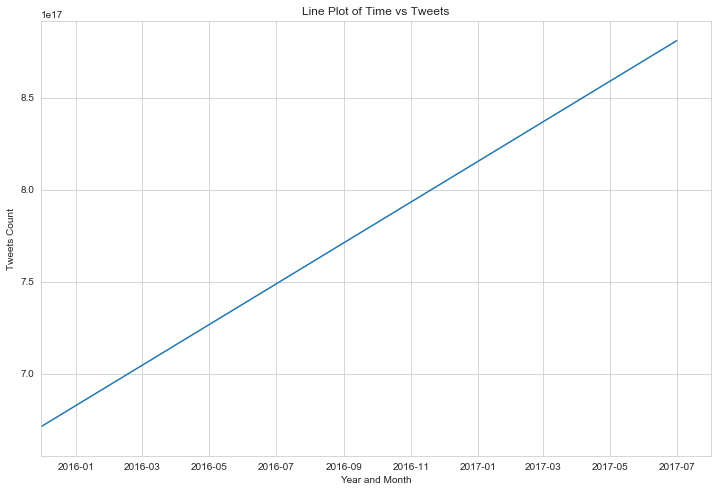

In [85]:
# Line plot of Time vs Tweets.
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 8, 1)]) 
plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')
plt.plot(df_tweets_clean.timestamp, df_tweets_clean.tweet_id)
plt.title('Line Plot of Time vs Tweets');

It is clear that number of tweets have increased alot over time. There is linear relation here between time and tweets which shows that WeRateDogs became immediately popular and keep growing.

### 3) Histograms of favorites and retweets

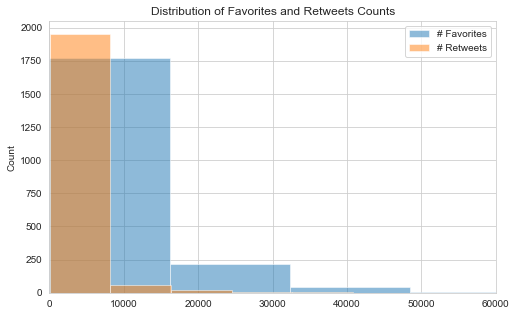

In [86]:
plt.figure(figsize=(8, 5))
plt.xlim(0, 60000)
plt.ylabel('Count')
plt.hist(df_tweets_clean.favorite_count, alpha=.5, label='# Favorites')
plt.hist(df_tweets_clean.retweet_count, alpha=.5, label='# Retweets')
plt.title('Distribution of Favorites and Retweets Counts')
plt.legend();

Maximum tweets have received retweets upto 10k and favourites around 15k .

### 4) Popular Dog Breeds on WeRateDogs: 

In [87]:
df_tweets_clean1 = df_tweets_clean.groupby('Dog_Breed').filter(lambda x: len(x) >= 20)

In [88]:
dogs = df_tweets_clean1['Dog_Breed'].value_counts()
dogs.index

Index(['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua',
       'pug', 'chow', 'Pomeranian', 'toy_poodle', 'Samoyed', 'malamute',
       'cocker_spaniel', 'Chesapeake_Bay_retriever', 'miniature_pinscher',
       'seat_belt', 'French_bulldog'],
      dtype='object')

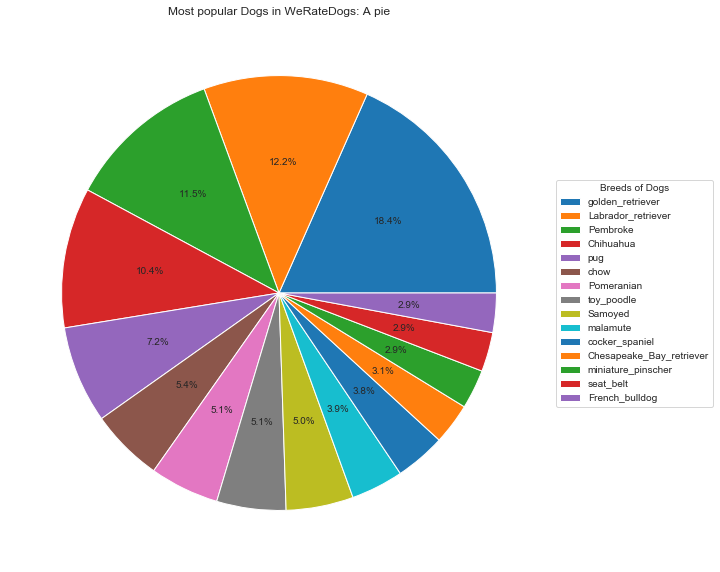

In [89]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.pie(dogs, autopct='%1.1f%%')
ax.legend(dogs.index,
          title="Breeds of Dogs",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# plt.setp(fig, size=8, weight="bold")

ax.set_title("Most popular Dogs in WeRateDogs: A pie")

plt.show()

### Observation from the pie chart:
* The most common dog on WeRateDOgs is Golden Retriever at 18.4%
* Second common pet dog is Labrador retriever at 12.2 then Pembroke followed by Chihuahua and so on,.
* Yet so, the varieties of breeds of dogs is huge as the most common breed is only at 18.4%.

### 5)To find out if dog stage affects ratings received.

In [91]:
Dog_stages = df_tweets_clean.Dog_Stage_y.value_counts()
Dog_stages.drop(index = 'None', inplace=True)

In [97]:
stagerate = df_tweets_clean.groupby('Dog_Stage_y').mean().reset_index()
stagerate = stagerate[['Dog_Stage_y', 'rating_numerator']]
stagerate.drop(index = 0, inplace=True)
stagerate

,Dog_Stage_y,rating_numerator
1,doggo,11.797101
2,doggo; floofer,11.000000
3,doggo; pupper,11.111111
4,doggo; puppo,13.000000
5,floofer,11.750000
6,pupper,10.726441
7,puppo,11.904762


* It seems there is little to no correlation between the two, but it seems doggo and puppo together tend to get more ratings!!

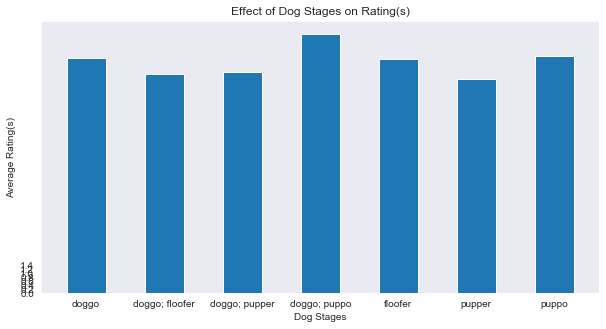

In [96]:
sns.set_style('dark')
plt.figure(figsize=(10, 5))

ind = np.arange(len(stagerate))    
width = 0.5                   

p1 = plt.bar(ind, stagerate.rating_numerator, width)

plt.xlabel('Dog Stages')
plt.ylabel('Average Rating(s)')
plt.title('Effect of Dog Stages on Rating(s)')
plt.xticks(ind, stagerate.Dog_Stage_y)
plt.yticks(np.arange(0, 1.6, .2));

### We can conclude that dog stage and ratings are not correlated

In [98]:
df_tweets_clean.to_csv('twitter_archive_master.csv', index = False)